MNIST model is used for recognize and differenciate handwritten numbers

In [1]:
#import keras
import keras

#MNIST data modules
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.core import Dense, Dropout , Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, CSVLogger

#matplotlib
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:

#batch size , number of classes, number of epochs
#training sets size
batch_size = 128
# 0,1,2,3,4,5,6,7,8,9 classes
num_classes = 10
# adjust 20 times
epochs = 20


# Read MNIST data
(x_train, y_train), (x_test, y_test)= mnist.load_data()


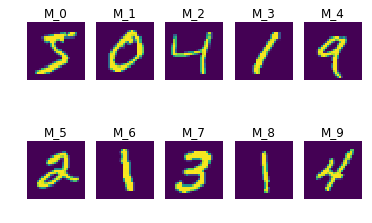

In [3]:
# show 10 images from MNIST database
# Image size 28*28=784

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title("M_%d" %i)
    plt.axis("off")
    plt.imshow(x_train[i].reshape(28,28), cmap=None)
plt.show()


In [4]:
#データ加工 prepare data for analysis

print("before normalization"+str(x_train.shape))
print("before normalization"+str(y_train.shape))

#normalize the size of the images 画像サイスを正規化 
# 60000 training images 
x_train =  x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000,784).astype('float32')

# normalize [0,255] to [0,1]
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


before normalization(60000, 28, 28)
before normalization(60000,)


In [5]:
# confirm the images size

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [6]:
# create the model

# First layer == Dense input (784,1) output (512)
model = Sequential()
model.add(Dense(512, input_shape=(784, )))
#activation function
model.add(Activation('relu'))
# to prevent over-learning  drop 20 % of the data and set it to zero randomly
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# output layer with num_classes  using softmax function
model.add(Dense(10))
# 尤度を返す　
model.add(Activation('softmax'))


In [7]:
# Show the summary 出力
model.summary()
# parameters dense_1== (784+1)*512  dense_2 == (512+1)*512 dense_3 =(512+1)*10 
# ONE BIASED DATA always get activated

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5

In [8]:
# Compile the model

model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(), 
                      metrics= ['accuracy'])
# stop after a while
es= EarlyStopping(monitor='val_loss', patience=2)
# take log of the training contents
csv_logger = CSVLogger('training.log')
hist = model.fit(x_train, y_train,
                batch_size = batch_size,
                epochs= epochs,
                verbose =1,
                validation_split = 0.1,
                callbacks= [es, csv_logger])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 7s 130us/sample - loss: 0.2621 - accuracy: 0.9195 - val_loss: 0.0957 - val_accuracy: 0.9713
Epoch 2/20
54000/54000 [==============================] - 6s 111us/sample - loss: 0.1086 - accuracy: 0.9669 - val_loss: 0.0773 - val_accuracy: 0.9767
Epoch 3/20
54000/54000 [==============================] - 6s 114us/sample - loss: 0.0787 - accuracy: 0.9762 - val_loss: 0.0707 - val_accuracy: 0.9793
Epoch 4/20
54000/54000 [==============================] - 6s 113us/sample - loss: 0.0633 - accuracy: 0.9812 - val_loss: 0.0726 - val_accuracy: 0.9803
Epoch 5/20
54000/54000 [==============================] - 6s 113us/sample - loss: 0.0524 - accuracy: 0.9848 - val_loss: 0.0688 - val_accuracy: 0.9830
Epoch 6/20
54000/54000 [==============================] - 6s 116us/sample - loss: 0.0439 - accuracy: 0.9864 - val_loss: 0.0735 - val_accuracy: 0.9820
Epoch 7/20
54000/54000 [===========================

In [9]:
#Test the accuracy of your model 
score = model.evaluate(x_test,y_test, verbose=0)
print('test_loss:', score[0])
print('test_acc', score[1])

test_loss: 0.08855981100113194
test_acc 0.9803


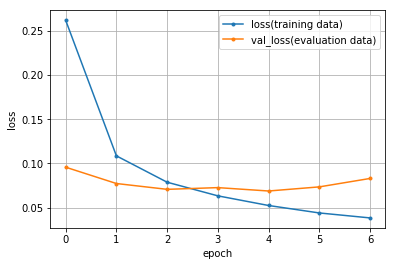

In [10]:
#show the results 
loss = hist.history['loss']
val_loss = hist.history['val_loss']


epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss(training data)' )
plt.plot(range(epochs), val_loss, marker='.', label = 'val_loss(evaluation data)')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# The more epochs the smaller loss for training data . nonetheless, for evaluation data
# there is no big change (overfitting)